Date: 03Nov2022    
Author: Lynn Menchaca

Resources: Spaceship Titanic Kaggle data set

This is my 2nd attempt working with the Spaceship Titanic data set. The purpose of this document is to practice new exploratory data analysis methods along with new feature engineering methods. With these new methods see if I can improve my accuracy with the test data set and my overall score with Kaggle.

#### Initial Overview

#### EDA
- Make copy of train data to play with
- Initial Overview: size, collumns, data types, missing values
- Initial Explore/Format Data: strings, temporal varialbes, impossible numbers
- Statistics/Explore Data: Distribution of numeric variables, categorical data
- Ansers to questions with plots

#### Feature Engineering
- Combine Test and Train Data
- Missing Data -> By end of this step all rows are filled in
- Format Data: strings, temporal varialbes -> 
    By end of this step all columns are ready for final processing and cleaning
- Treating Outliers
- Scaling/Transformation
- Encoding methods
- Handel Imbalance Data set
- Split Test and Train Data -> Export both to csv file for Feature Selection Process




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in the Spaceship Titanic data set

data_file_path = '/Users/lynnpowell/Documents/DS_Projects/Spaceship_Titanic/'
df_train = pd.read_csv(data_file_path+'train.csv')
df_test = pd.read_csv(data_file_path+'test.csv')
#df_train.head()

#Make a copy of train data set to play with
df = df_train.copy()
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [3]:
#Overview of data
print(df_train.shape)
print(df_test.shape)
print('\n')
print(df.info())

(8693, 14)
(4277, 13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [4]:
print(df['HomePlanet'].isnull().mean())
print(df['HomePlanet'].isnull().sum()/8693)

0.023122052225928908
0.023122052225928908


In [5]:
# Number of missing values
print(df.isnull().sum())
print('\n')

#Percentage of missing values
feat_nan_list = [feat for feat in df.columns if df[feat].isnull().sum() > 1]

for feat in feat_nan_list:
    missing_perc = df[feat].isnull().mean()*100
    print(feat + ' missing percent: ' + str(round(missing_perc,2)) + '%')

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


HomePlanet missing percent: 2.31%
CryoSleep missing percent: 2.5%
Cabin missing percent: 2.29%
Destination missing percent: 2.09%
Age missing percent: 2.06%
VIP missing percent: 2.34%
RoomService missing percent: 2.08%
FoodCourt missing percent: 2.11%
ShoppingMall missing percent: 2.39%
Spa missing percent: 2.11%
VRDeck missing percent: 2.16%
Name missing percent: 2.3%


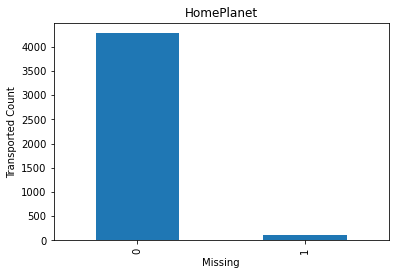

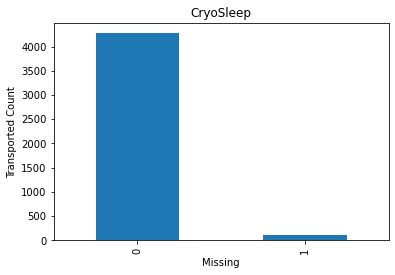

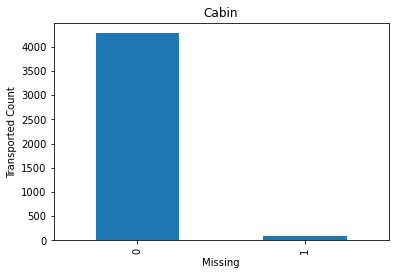

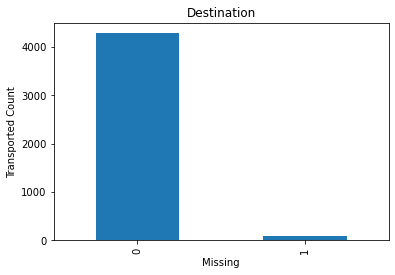

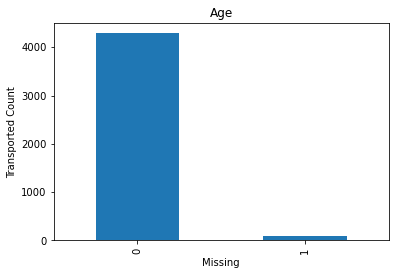

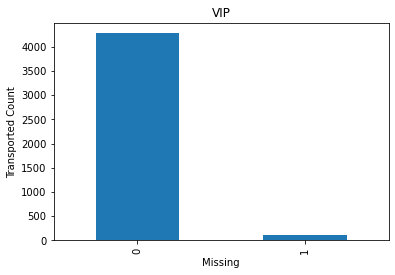

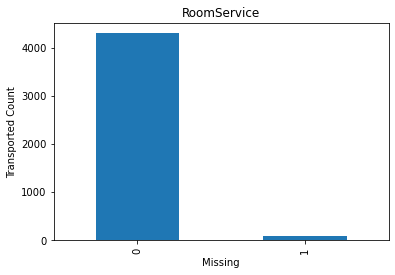

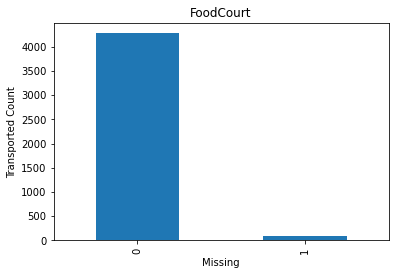

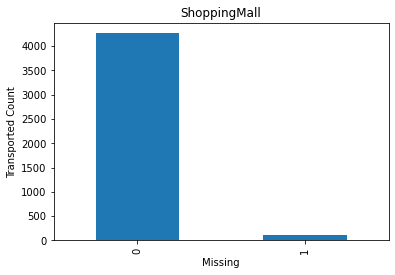

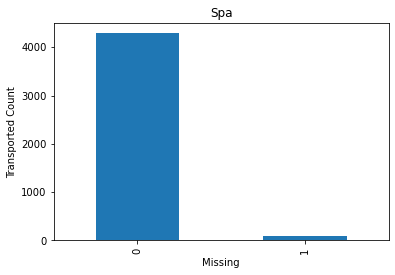

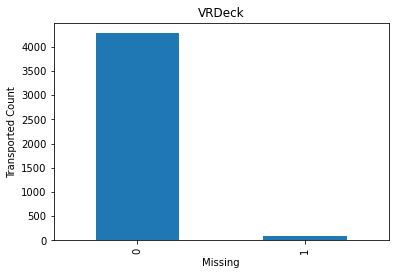

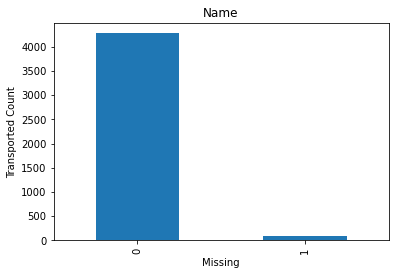

In [6]:
#Thinking about removing this cell not learning anything from it

#Looking for relation between missing values and Transported

for feat in feat_nan_list:
    data = df.copy()
    data[feat] = np.where(data[feat].isnull(), 1, 0)
    data.groupby(feat)['Transported'].sum().plot.bar()
    plt.xlabel('Missing')
    plt.ylabel('Transported Count')
    plt.title(feat)
    plt.show()

In [7]:
# Exploring String data

#Columns: HomePlanet, Cabin, Destination, Name, PassengerId

df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

categorical data (3 categories), no pre-cleaning required

In [8]:
#cabin -> deck/ number/ side
#Side (P for port or S for Starboard)
df['Ship_Deck'] = df.Cabin.str.split('/').str.get(0)
df['Cabin_Num'] = pd.to_numeric(df.Cabin.str.split('/').str.get(1))
df['Ship_Side'] = df.Cabin.str.split('/').str.get(2)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Ship_Deck,Cabin_Num,Ship_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [9]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

categorical data (3 categories), no pre-cleaning required

In [10]:
# Cleaning String data
#Looking for titles, prefixes or suffixes in the name column

df['Name'].str.split().str.len().value_counts()

2.0    8493
Name: Name, dtype: int64

There does not appear to be any prefixes or suffixes in the name column

In [11]:
#PassengerId - group_number in group

df['ID_Group'] = pd.to_numeric(df.PassengerId.str.split('_').str.get(0))
df['Num_In_Group'] = pd.to_numeric(df.PassengerId.str.split('_').str.get(1))
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Ship_Deck,Cabin_Num,Ship_Side,ID_Group,Num_In_Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,4,1


In [12]:
print(df.shape)
print('\n')
print(df.info())

(8693, 19)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Ship_Deck     8494 non-null   object 
 15  Cabin_Num     8494 non-null   float64
 16  Ship_Side     8494 non-null   object 
 17  ID_Group      8693 non-null   int64  
 18  Num_In_Group  8

In [13]:
#Distribution of numeric values

#creating a list of numerical features
num_feat_lst = [feat for feat in df.columns if (df[feat].dtype != 'O' and df[feat].dtype != 'bool')]
print(num_feat_lst)
print('Number of numeric features: ' + str(len(num_feat_lst)))
print('\n')

# Looking for discrete numeric features
discrete_feat_lst = [feat for feat in num_feat_lst if (len(df[feat].unique()) < 10)]
print(discrete_feat_lst)
print('Number of discrete features: ' + str(len(discrete_feat_lst)))
print('\n')

# Looking for continuous numeric features
contin_feat_lst = [feat for feat in num_feat_lst if (len(df[feat].unique()) > 10)]
print(contin_feat_lst)
print('Number of continuous features: ' + str(len(contin_feat_lst)))

df[num_feat_lst].head()

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'ID_Group', 'Num_In_Group']
Number of numeric features: 9


['Num_In_Group']
Number of discrete features: 1


['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'ID_Group']
Number of continuous features: 8


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Num,ID_Group,Num_In_Group
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,2,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,3,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,3,2
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,4,1


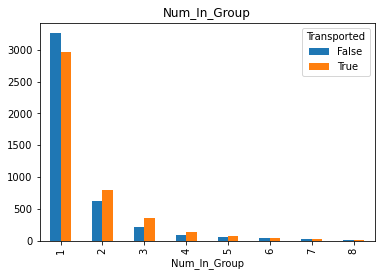

In [14]:
#Plotting Discrete Data - bar

for feat in discrete_feat_lst:
    df.groupby([feat,'Transported']).size().unstack('Transported').plot.bar()
    plt.title(feat)
    plt.show()

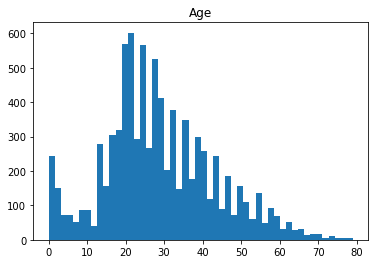

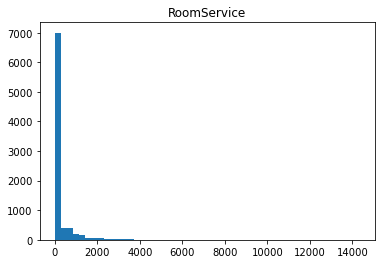

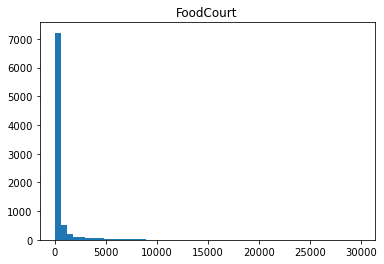

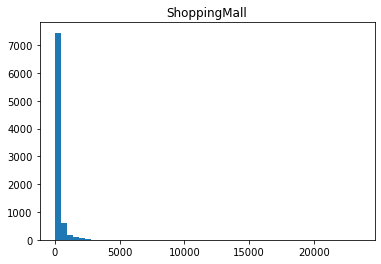

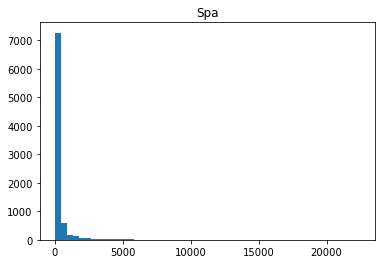

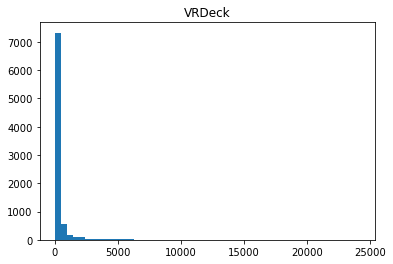

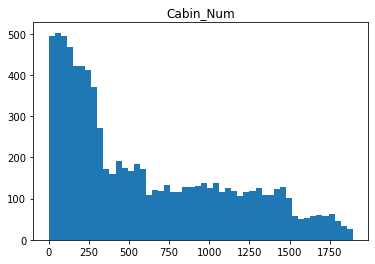

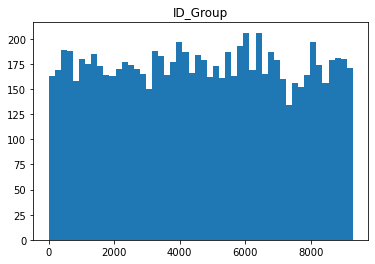

In [15]:
#Plotting Continuous Data - historgrams

for feat in contin_feat_lst:
    #contin_data = df.groupby([feat,'Transported']).size().unstack('Transported').plot.bar()
    plt.hist(df[feat], density=False, bins=50)
    plt.title(feat)
    plt.show()

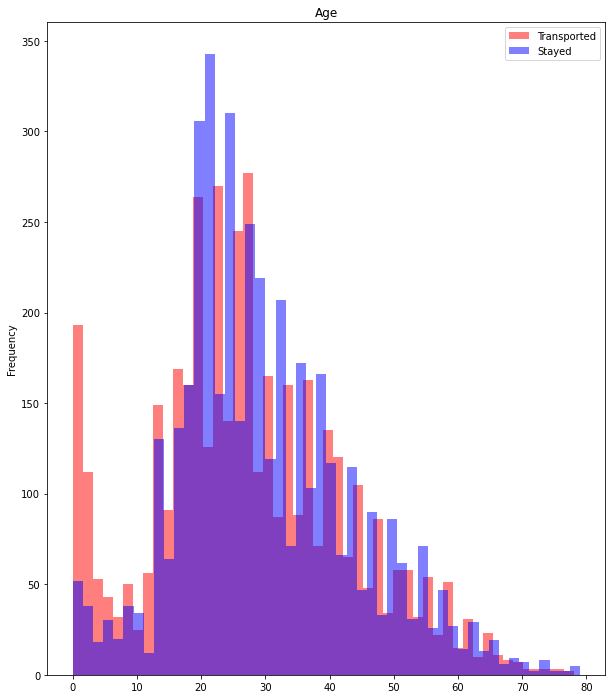

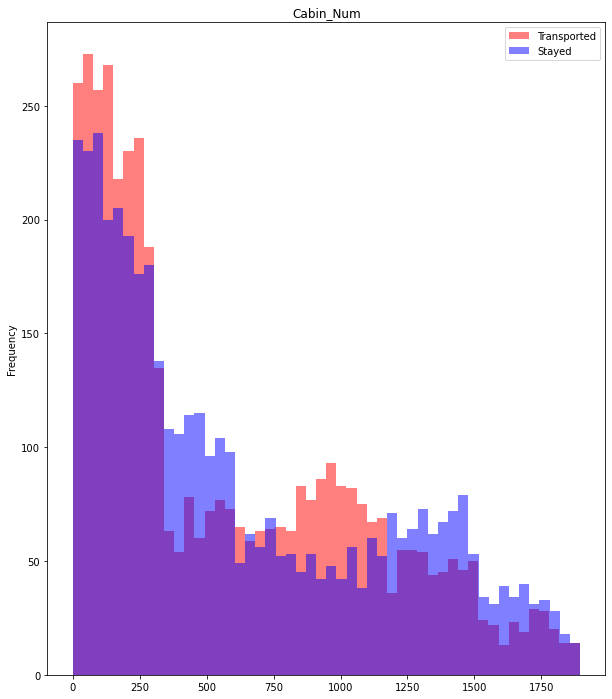

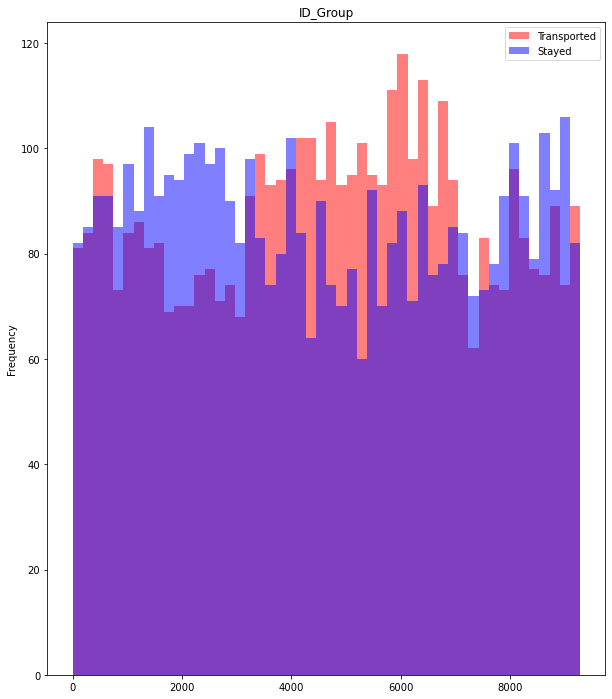

In [16]:
#Plotting just the age, Cabin_Num, ID_Group
num_data = ['Age','Cabin_Num','ID_Group']

#Historam of age with transported and stayed
for feat in num_data:
    plt.figure(figsize=(10,12))
    transported = df[df["Transported"] == True]
    stayed = df[df["Transported"] == False]
    transported[feat].plot.hist(alpha=0.5,color='red',bins=50)
    stayed[feat].plot.hist(alpha=0.5,color='blue',bins=50)
    plt.title(feat)
    plt.legend(['Transported','Stayed'])
    plt.show()


Children with ages younger than 20 were more likely to be transported.

I looks like the cabin low cabin numbers have higher transported passenger count and the higher cabin numbers have a high stayed passenger count.

No conclusions drawn from ID_Group column.

In [17]:
#Plotting just the spending

#List of spending features
money_feat = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#creating a column with total value spend
df['Total_Spent'] = df[money_feat].sum(axis=1)
money_feat += ['Total_Spent']

df[money_feat].head(10)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Spent
0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0,736.0
2,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,303.0,70.0,151.0,565.0,2.0,1091.0
5,0.0,483.0,0.0,291.0,0.0,774.0
6,42.0,1539.0,3.0,0.0,0.0,1584.0
7,0.0,0.0,0.0,0.0,NaN,0.0
8,0.0,785.0,17.0,216.0,0.0,1018.0
9,0.0,0.0,0.0,0.0,0.0,0.0


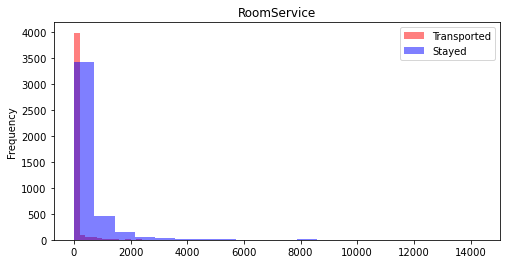

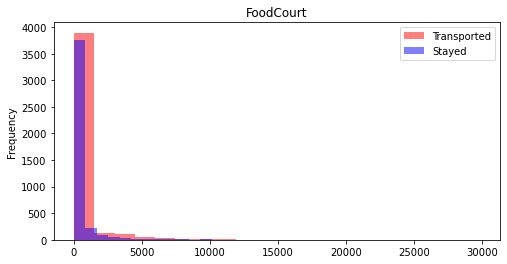

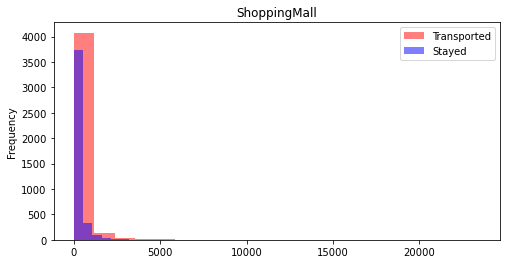

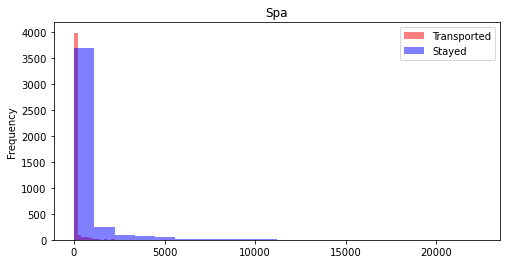

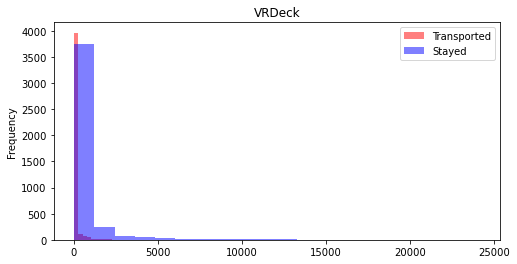

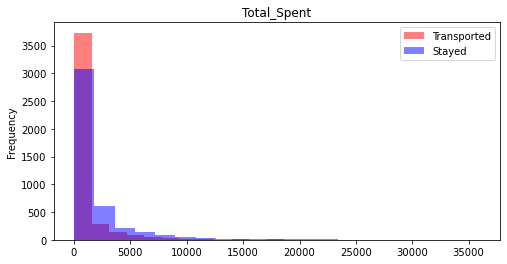

In [18]:
#data frame with awake passengers (CryoSleep = False) to the $0 spent is not misleading

df_awake = df[df['CryoSleep'] == False]

for feat in money_feat:
    plt.figure(figsize=(8,4))
    transported = df[df["Transported"] == True]
    stayed = df[df["Transported"] == False]
    transported[feat].plot.hist(alpha=0.5,color='red',bins=20)
    stayed[feat].plot.hist(alpha=0.5,color='blue',bins=20)
    plt.title(feat)
    plt.legend(['Transported','Stayed'])
    plt.show()
    

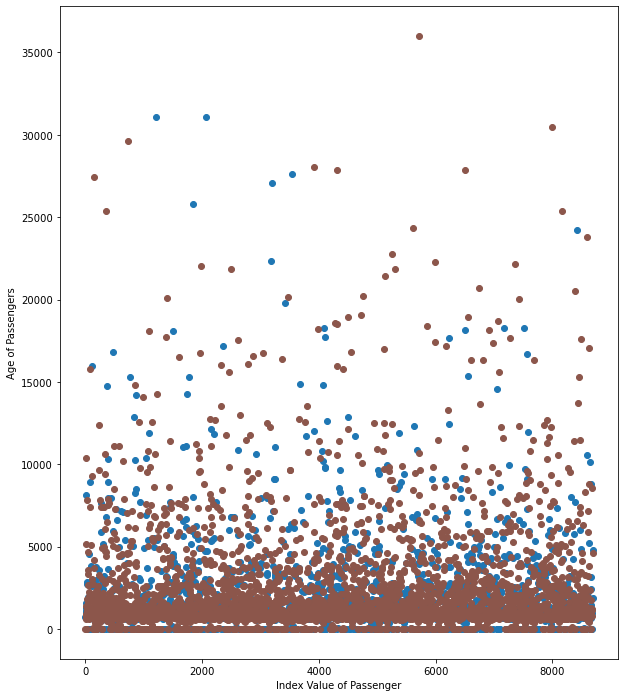

In [19]:
#Playing with different ways to analyze money spent while on board the ship

plt.figure(figsize=(10,12))
transported = df_awake[df_awake["Transported"] == True]
stayed = df_awake[df_awake["Transported"] == False]
plt.scatter(list(transported.index.values), transported['Total_Spent'], c='#1f77b4')
plt.scatter(list(stayed.index.values), stayed['Total_Spent'], c='#8c564b')
plt.xlabel('Index Value of Passenger')
plt.ylabel('Age of Passengers')
plt.show()

In [20]:
#Analyze Categorical Data
#No boolean data to analyze outside of Transported column
cat_feat = [feat for feat in df.columns if df[feat].dtype == 'O']
cat_feat.remove('PassengerId')
cat_feat.remove('Name')
cat_feat.remove('Cabin')
print(cat_feat)
print('Number of Categorical Features: ' + str(len(cat_feat)))

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Ship_Deck', 'Ship_Side']
Number of Categorical Features: 6


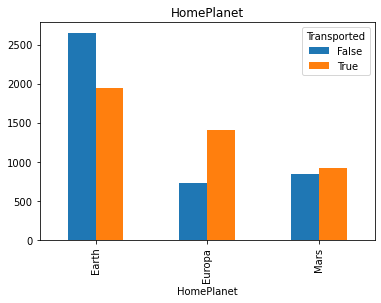

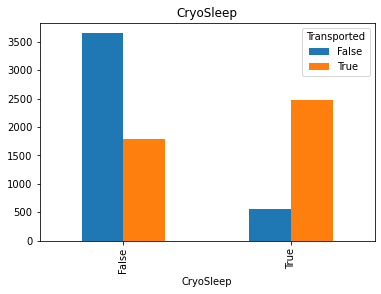

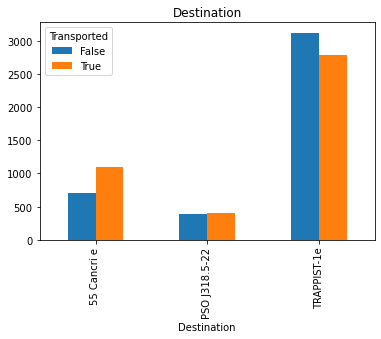

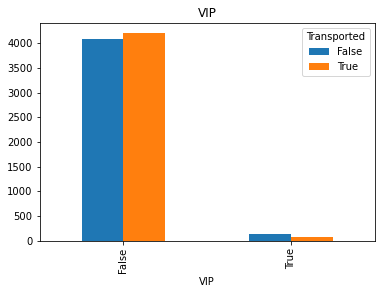

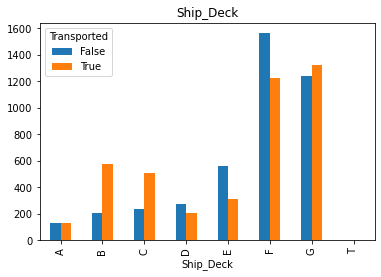

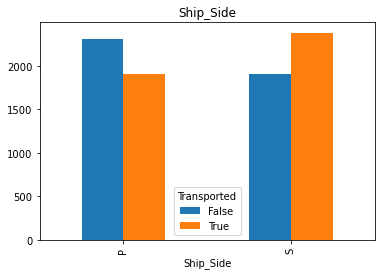

In [21]:
#bar ploting categorical data

for feat in cat_feat:
    df.groupby([feat, 'Transported']).size().unstack('Transported').plot.bar()
    plt.title(feat)
    plt.show()
    

HomePlant: Earth - higher Stay, Europa - higher transported, Mars - about even leaning towards transported

CryoSleep: Passengers in CryoSleep were significantly more likely to be transported than passengers awake

Destination: 55 Cancri e - higher Transported, Trappist-le - higher statyed, PSO J318.5-22 - about even leaning towards Transported

VIP: Not a very balanced feature, not very many people with VIP status. Passengers with VIP status was about even transported and stayed with a lean towards stayed

Ship Deck: High Stayed: Deck F, E -> High Transport: Deck B, C -> About even: Deck A, D, G and T

Ship Side: Starboard side has a higher percentage of transported passengers

#### Feature Engineering
- Combine Test and Train Data
- Missing Data -> By end of this step all rows are filled in
- Format Data: strings, temporal varialbes -> 
    By end of this step all columns are ready for final processing and cleaning
- Treating Outliers
- Scaling/Transformation
- Encoding methods
- Handel Imbalance Data set
- Split Test and Train Data -> Export both to csv file for Feature Selection Process

In [22]:
#combining the train and test data
df = df_train.append(df_test, ignore_index=True)
df.tail()

#splitting the data back in to train and test data frames
#df_test = df[df['Transported'].isnull()]
#df_train = df[~df['Transported'].isnull()]

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1024/1820079770.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test, ignore_index=True)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


In [23]:
#Did this stage to early do after all missing values have been filled in


#Re-adding features created above
#cabin -> deck/ number/ side
#Side (P for port or S for Starboard)
#df['Ship_Deck'] = df.Cabin.str.split('/').str.get(0)
#df['Cabin_Num'] = pd.to_numeric(df.Cabin.str.split('/').str.get(1))
#df['Ship_Side'] = df.Cabin.str.split('/').str.get(2)

#PassengerId - group_number in group
#df['ID_Group'] = pd.to_numeric(df.PassengerId.str.split('_').str.get(0))
#df['Num_In_Group'] = pd.to_numeric(df.PassengerId.str.split('_').str.get(1))

#money_feat = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
#creating a column with total value spend
#df['Total_Spent'] = df[money_feat].sum(axis=1)

#df.head()

In [24]:
#Looking at all features with missing values
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [27]:
#Since Passenger ID nan count is 0 -> can split the Passenger ID data performed
df['ID_Group'] = pd.to_numeric(df.PassengerId.str.split('_').str.get(0))
df['Num_In_Group'] = pd.to_numeric(df.PassengerId.str.split('_').str.get(1))

In [28]:
#Making the assumption if the passengers are in the same family then they have the same:
#Homeplanet, Cabin, Destination and VIP status
fill_features = ['HomePlanet', 'Cabin', 'Destination', 'VIP']

#cleaning each feature independently
for feat in fill_features:
    #list of all index rows with null values for single feature
    null_index = df.index[df[feat].isnull()].tolist()
    
    for df_index in null_index:
        #Finding the group each index row belongs to
        id_group = df['ID_Group'].iloc[df_index]
        
        #Checking if they are a solo traveling passengers
        if len(df[df['ID_Group']==id_group])>1:
            group_index = df.index[df['ID_Group']==id_group].tolist()
            group_index.remove(df_index)
            i = 0
            #Use while loop to go though each group member
            while i < len(group_index):
                if group_index[i] in null_index:
                    i += 1
                else:
                    break
            #making sure the value of i can fit in the group_index array
            if i == len(group_index):
                i -= 1
            
            #Filling in the null values with last listed member in group data for single feature
            df[feat].iloc[[df_index]] = df[feat].iloc[[group_index[i]]]

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1024/2374147963.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat].iloc[[df_index]] = df[feat].iloc[[group_index[i]]]


In [30]:
df[fill_features].isnull().sum()

HomePlanet     157
Cabin          162
Destination    154
VIP            172
dtype: int64

In [ ]:
#Filling in Homeplanet


In [25]:
#Checking the assumption if the passenger is in suspended animation they don't spend money
df_awake = df[df['CryoSleep']==True]
df_awake[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

Since spending sum is $0.0 for each location, assuming if the passenger is in cryo sleep they do not spend any money.

In [26]:
#Using the Spend_Sum to set the CryoSleep as False if money was spent

df.loc[((df['CryoSleep'].isna()) & (df_train['Spend_Sum']!=0)),'CryoSleep'] = False

KeyError: 'Spend_Sum'